Import necessary module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Generate data

In [2]:
n_examples = 100
n_features = 2

data = np.random.randn(n_examples, n_features)
data[:50, :] = data[:50, :] - 2*np.ones((50, n_features))
data[50:, :] = data[50:, :] + 2*np.ones((50, n_features))

Put data into X, and generate Y

In [3]:
X = np.array(data)
Y = np.array([[0]*50 + [1]*50]).T

Show data graph

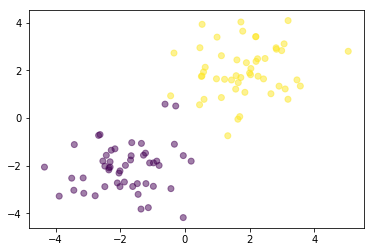

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=Y, alpha=0.5)
plt.show()

Define variables

In [5]:
theta = np.random.randn(n_features, 1)
b = np.random.randn(1, 1)
learning_rate = 3e-1
n_epochs = 300
cost_list = []

Define some functions

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(X, theta, b):
    return sigmoid(np.dot(X, theta) + b)

def cost(X, Y, theta, b):
    m = len(X)
    return -1.0/m * np.sum(Y*np.log(hypothesis(X, theta, b)) + (1-Y)*np.log(1-hypothesis(X, theta, b)))

def derivative_theta(X, Y, theta, b):
    m = len(X)
    return 1.0/m * X.T.dot(hypothesis(X, theta, b) - Y)

def derivative_bias(X, Y, theta, b):
    m = len(X)
    return 1.0/m * np.sum((hypothesis(X, theta, b) - Y), axis=0)

Run gradient descent

In [7]:
cost_list.append(cost(X, Y, theta, b))
for _ in range(n_epochs):
    theta -= learning_rate * derivative_theta(X, Y, theta, b)
    b -= learning_rate * derivative_bias(X, Y, theta, b)
    cost_list.append(cost(X, Y, theta, b))

Draw cost graph

Classification rate:  1.0


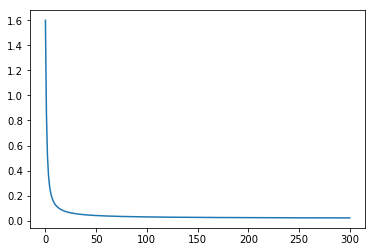

In [8]:
print "Classification rate: ", np.mean(Y == np.round(hypothesis(X, theta, b)))
plt.plot(cost_list)
plt.show()